In [8]:
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

plt.rcParams['figure.dpi'] = 120

print("OpenCV Version: %s" % cv.__version__)

OpenCV Version: 4.1.0


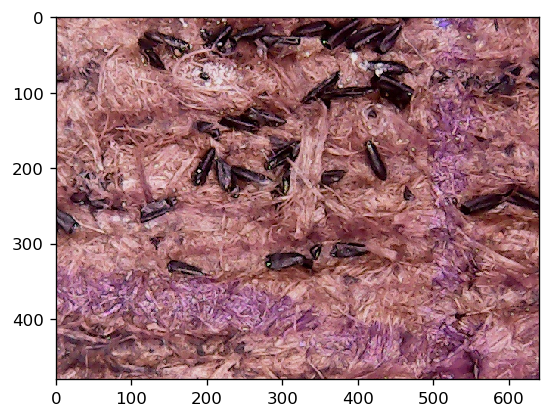

In [9]:
img = cv.imread('images/aedes.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

plt.imshow(img)

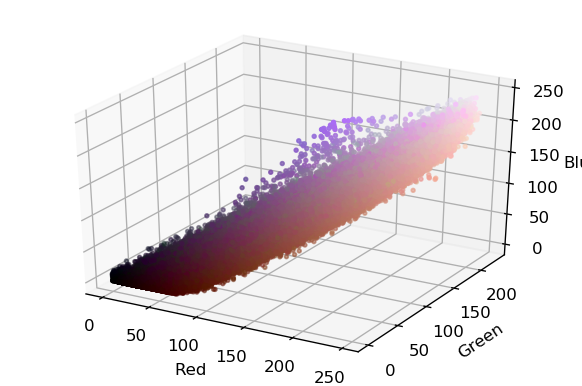

In [10]:
# setup the plot
r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.gca(projection="3d")

# setup pixel colors
pixel_colors = img.reshape((np.shape(img)[0] * np.shape(img)[1], 3))
norm = colors.Normalize(vmin = -1., vmax = 1.)
norm.autoscale(pixel_colors)
pixel_colors = list(norm(pixel_colors))

# ploting
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolor=pixel_colors, marker='.')
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

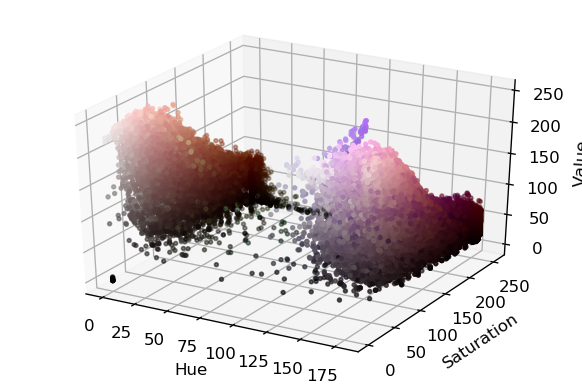

In [11]:
hsv_img = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection='3d')

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker='.')
axis.set_xlabel('Hue')
axis.set_ylabel('Saturation')
axis.set_zlabel('Value')

plt.show()

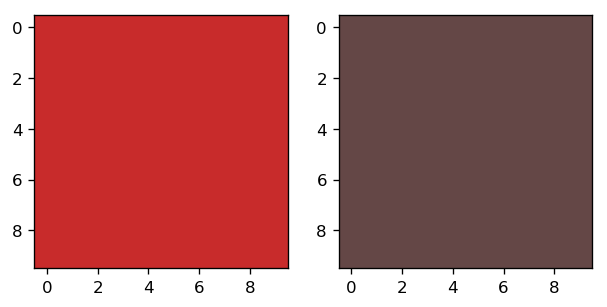

In [25]:
# pick up color tons range
# HSV system
# light = (1, 75, 100)
# dark = (255, 200, 200)
# plt.imshow(hsv_img)
# plt.show()

light = (1, 75, 100)
dark = (255, 200, 200)

# light = (1, 100, 1)
# dark = (18, 255, 255)

# plot chosen colors
lb = np.full((10, 10, 3), light, dtype=np.uint8) / 255.0
db = np.full((10, 10, 3,), dark, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(colors.hsv_to_rgb(db))
plt.subplot(1, 2, 2)
plt.imshow(colors.hsv_to_rgb(lb))
plt.show()

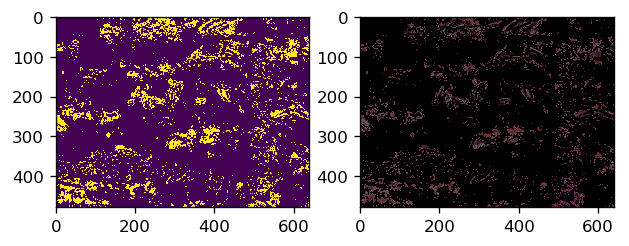

In [39]:
light = (110, 0, 0)
dark = (255, 185, 120)

mask = cv.inRange(hsv_img, light, dark)
mask_inverted = cv.bitwise_not(mask)
result = cv.bitwise_and(img, img, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()